In [2]:
import numpy as np
import pandas as pd

In [3]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hier
from scipy.spatial import distance as ssd

In [5]:
df = pd.read_csv("cluster1_smiles.smi", sep=" ", names=["Smiles", "Name"])
df

,Smiles,Name
0,c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3,ZINC000015828584
1,COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccc...,ZINC000015162196
2,n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+]...,ZINC000012308844
3,C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2,ZINC000008377044
4,C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2,ZINC000008377044
...,...,...
17301,c1ccccc1CCNC(=O)[C@H]2CCC[N@@H+](C2)C3CCN(CC3)...,ZINC000012594867
17302,C1[NH2+]CC[C@@H]1c(n2)nc(C)c(c23)CCC(=O)N3CCCc...,ZINC000257249130
17303,Cn1cc[nH+]c1[C@@H](c2ccc(F)cc2)NC(=O)CNC(=O)c3...,ZINC000012575505
17304,COc1c(Cl)cc(cc1OC)C[NH2+]CCc(c[nH]2)c(c23)cccc3,ZINC000004488639


In [6]:
smiles_list = df["Smiles"].tolist()
smiles_list

['c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3',
 'COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccccc3)C[C@@H](C)[N@H+](C)C[C@@H]2C',
 'n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+](CC2)C(C3)Cc(c34)cccc4',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2',
 'C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2cccc(Cl)c2',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2c(Cl)cccc2Cl',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccccc2',
 'c1c(O)c(OC)cc(c12)[C@H]([NH2+]CC2)C[C@@H]([C@@H](C3)CC)C[C@H]([N@H+]34)c5c(CC4)cc(OC)c(c5)OC',
 'C[NH+](C)CCC[NH2+]Cc1ccc(c(Br)c1)OCc2ccccc2',
 'C[NH+](C)CCC[NH2+]Cc1ccc(c(Br)c1)OCc2ccccc2',
 'c1ccccc1NC(=O)NC[C@@H](C[C@H]23)[N@@H+](CC2)C[C@@H]3C[N@@H+]4CC[C@H](CC4)Cc5ccccc5',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc

In [7]:
names_list = df["Name"].tolist()
names_list

['ZINC000015828584',
 'ZINC000015162196',
 'ZINC000012308844',
 'ZINC000008377044',
 'ZINC000008377044',
 'ZINC000011878175',
 'ZINC000011878175',
 'ZINC000008373857',
 'ZINC000008373857',
 'ZINC000008377059',
 'ZINC000008377035',
 'ZINC000008377063',
 'ZINC000097974162',
 'ZINC000010435612',
 'ZINC000010435612',
 'ZINC000067870802',
 'ZINC000057263116',
 'ZINC000040720244',
 'ZINC000095406666',
 'ZINC000057263116',
 'ZINC000524729739',
 'ZINC000524729739',
 'ZINC000524729739',
 'ZINC000020876527',
 'ZINC000009575606',
 'ZINC000008373857',
 'ZINC000015066087',
 'ZINC000015066087',
 'ZINC000065464251',
 'ZINC000020876527',
 'ZINC000016362763',
 'ZINC000010435612',
 'ZINC000011677652',
 'ZINC000040720244',
 'ZINC000022241629',
 'ZINC000005723878',
 'ZINC000015774005',
 'ZINC000035112650',
 'ZINC000008377035',
 'ZINC000008377063',
 'ZINC000019632917',
 'ZINC000095521062',
 'ZINC000020295574',
 'ZINC000002036827',
 'ZINC000011813062',
 'ZINC000096180375',
 'ZINC000016362763',
 'ZINC0002525

In [8]:
mol_list = []
fp_list = []
for i, j in zip(names_list, smiles_list):
    mol = Chem.MolFromSmiles(j)
    fps = Chem.RDKFingerprint(mol)
    mol_list.append(mol)
    fp_list.append(fps)

In [9]:
num_of_mol = len(fp_list)
num_of_mol

17306

In [10]:
hmap = np.empty(shape=(num_of_mol, num_of_mol))
hmap

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for m,fpsi in enumerate(fp_list):
    for n,fpsj in enumerate(fp_list):
        tc = DataStructs.TanimotoSimilarity(fpsj, fpsi)
        hmap[m, n] = tc
hmap

array([[1.        , 0.25396825, 0.24932493, ..., 0.2513704 , 0.26728499,
        0.17483189],
       [0.25396825, 1.        , 0.33919338, ..., 0.26790227, 0.38235294,
        0.32941176],
       [0.24932493, 0.33919338, 1.        , ..., 0.22319859, 0.26290166,
        0.3021767 ],
       ...,
       [0.2513704 , 0.26790227, 0.22319859, ..., 1.        , 0.29356223,
        0.24568528],
       [0.26728499, 0.38235294, 0.26290166, ..., 0.29356223, 1.        ,
        0.21589689],
       [0.17483189, 0.32941176, 0.3021767 , ..., 0.24568528, 0.21589689,
        1.        ]])

In [12]:
hmap1 = 1-hmap
hmap1

array([[0.        , 0.74603175, 0.75067507, ..., 0.7486296 , 0.73271501,
        0.82516811],
       [0.74603175, 0.        , 0.66080662, ..., 0.73209773, 0.61764706,
        0.67058824],
       [0.75067507, 0.66080662, 0.        , ..., 0.77680141, 0.73709834,
        0.6978233 ],
       ...,
       [0.7486296 , 0.73209773, 0.77680141, ..., 0.        , 0.70643777,
        0.75431472],
       [0.73271501, 0.61764706, 0.73709834, ..., 0.70643777, 0.        ,
        0.78410311],
       [0.82516811, 0.67058824, 0.6978233 , ..., 0.75431472, 0.78410311,
        0.        ]])

In [13]:
hmap1_array = ssd.squareform(hmap1)
hmap1_array

array([0.74603175, 0.75067507, 0.81219748, ..., 0.70643777, 0.75431472,
       0.78410311])

In [14]:
linked = hier.linkage(hmap1_array, 'single')
linked

array([[9.62000000e+02, 9.63000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.86300000e+03, 4.86900000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.26210000e+04, 1.67500000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.40030000e+04, 3.46070000e+04, 6.91003911e-01, 1.73030000e+04],
       [2.25650000e+04, 3.46080000e+04, 7.03832753e-01, 1.73050000e+04],
       [4.85900000e+03, 3.46090000e+04, 7.11538462e-01, 1.73060000e+04]])

In [17]:
import sys
sys.setrecursionlimit(10000)

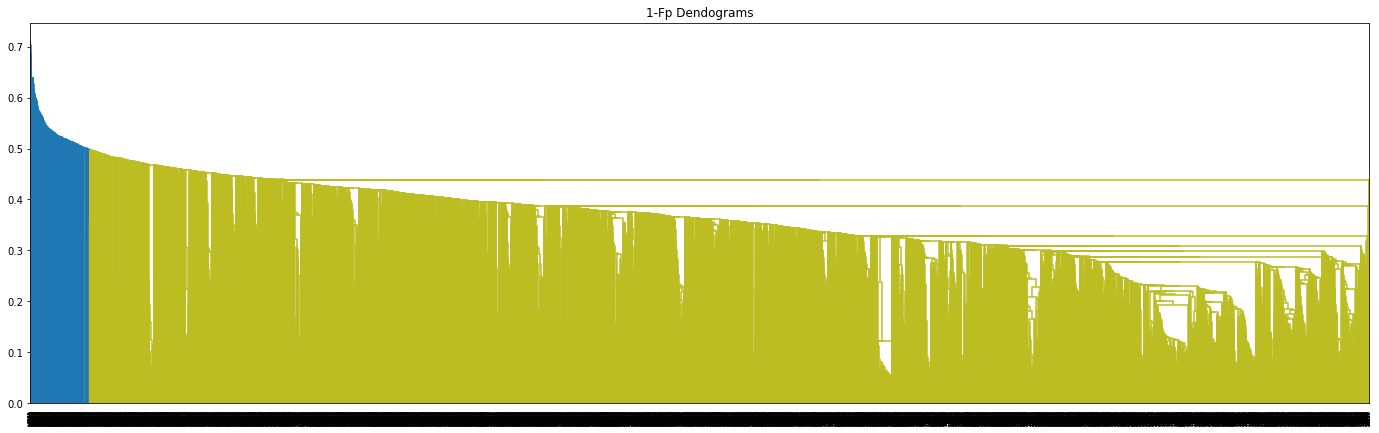

In [21]:
plt.figure(figsize=(24, 7))
plt.title("1-Fp Dendograms")
dend = hier.dendrogram(linked)
plt.show()